Assignment No.1:k-nearest neighbors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Before running this block, make sure to upload "data.mat" in the google drive.

In [ ]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/MyDrive/Internship/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"WhatsApp Image 2024-07-11 at 18.11.20_c0c5102c.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']

images.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [ ]:
import numpy as np
images= np.transpose(images)
print(images.shape)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(3072, 50)


(32, 32, 3)


(32, 32, 3)

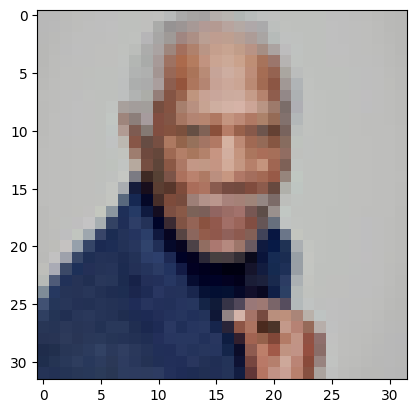

In [ ]:
from matplotlib import pyplot as plt
#import cv2
plt.imshow(images)
plt.imshow(im[:,:,:,0])
print(im[:,:,:,0].shape)
a= im[:,:,:,0]
plt.imshow(a)
a.shape

You Need to write your code in this block.

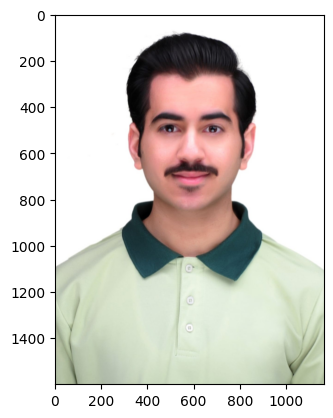

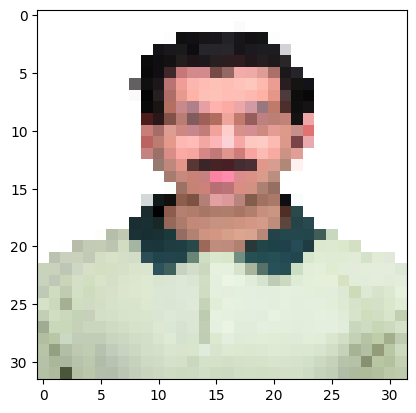

Distance to image 1: 540.2804827124519
Distance to image 2: 536.5417038777135
Distance to image 3: 575.4398317808735
Distance to image 4: 582.4774673753484
Distance to image 5: 601.6710064478759
Distance to image 6: 467.48475910985593
Distance to image 7: 570.1841807696878
Distance to image 8: 598.4187497062571
Distance to image 9: 567.6239952644709
Distance to image 10: 562.1618983887115
Distance to image 11: 572.7206998179828
Distance to image 12: 580.8975813342659
Distance to image 13: 568.7451098690872
Distance to image 14: 566.5086054068375
Distance to image 15: 573.7360020078921
Distance to image 16: 573.9625423318146
Distance to image 17: 556.9748647829631
Distance to image 18: 567.8600179621735
Distance to image 19: 568.4593213238745
Distance to image 20: 568.5138520739843
Distance to image 21: 577.8650361459845
Distance to image 22: 559.0661857061291
Distance to image 23: 480.4862120810544
Distance to image 24: 568.639604670656
Distance to image 25: 516.1143284195857
Distance 

In [ ]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray


for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")
#print(im.shape)
    #Read your image here
####### Your code here #######
img_bgr = cv2.imread(test_image)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img)
plt.show()




############################


    #Resize your image
####### Your code here #######

img = cv2.resize(img, (32, 32))
plt.imshow(img)
plt.show()


##############################


    #Reshape your image as we reshape the image of dataset
####### Your code here #######

img = np.reshape(img, [-1], order="F")


#############################
    #Calculate Eucleadian distance between your image and dataset
####### Your code here #######
distances = []
for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F")
    #print(im.shape)

    # Calculate Euclidean distance between the test image and dataset image
    euc_distance = np.sqrt(np.sum((img - G) ** 2))
    print(f"Distance to image {i+1}: {euc_distance}")
    distances.append((euc_distance, i))

distances = sorted(distances)
print(distances)


##############################

In this Block you need to fill the code for 1-NN.

The 1 NN image has a distance of 467.48475910985593 and the image is of [array(['ahsan khan'], dtype='<U10')] 


TypeError: Invalid shape (3072,) for image data

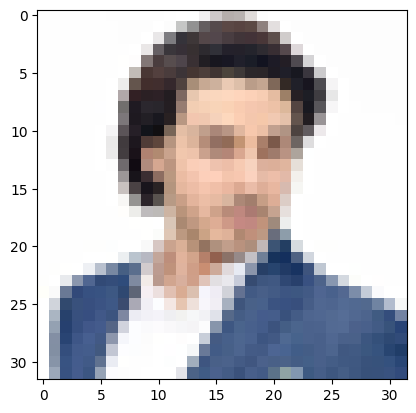

In [ ]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
min_distance = distances[0]
print(f"The 1 NN image has a distance of {min_distance[0]} and the image is of {label[min_distance[1]]} ")
one_NN= im[:,:,:,min_distance[1]]
plt.imshow(one_NN)





##############################


Write code for 3 NN



The 3 NN images are following:


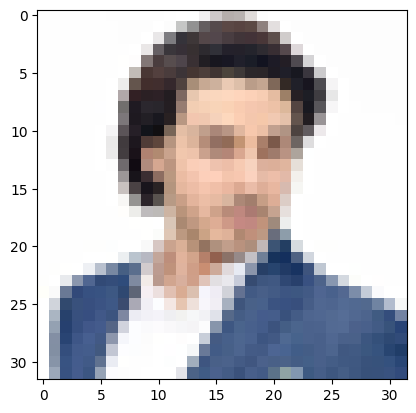

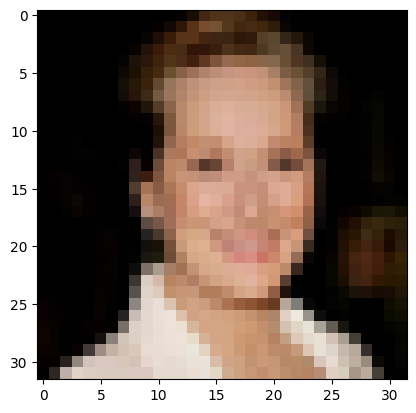

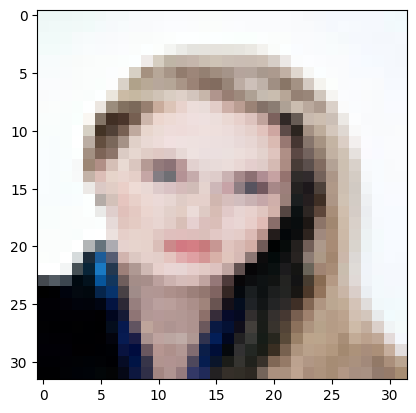


The 3 NN image is of ['meryl streep'] 


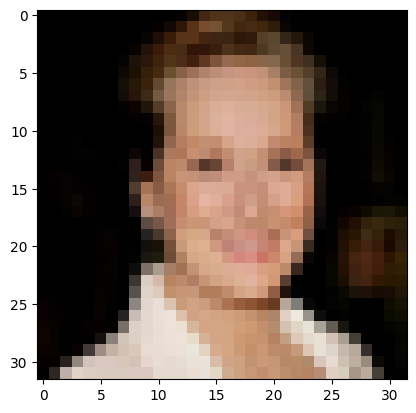

In [ ]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop
k = 3
####### Your code here #######
def KNN_images(distances,k):
    min_distances = distances[:k]  # Rename to min_distances to indicate it's a list of tuples
    for i in range(k):
       image = im[:,:,:,min_distances[i][1]]  # Access the index from each tuple
       plt.imshow(image)
       plt.show()


def get_most_frequent_image(distances, k):
    nearest_labels = [str(label[distances[i][1]].flatten()) for i in range(k)]
    nearest_indices = [distances[i][1] for i in range(k)]

    label_counts = {}
    for lbl in nearest_labels:
        if lbl in label_counts:
            label_counts[lbl] += 1
        else:
            label_counts[lbl] = 1

    sorted_list = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

    if sorted_list[0][1] > 1:
        common_indices = [i for i in nearest_indices if str(label[i].flatten()) == sorted_list[0][0]]
        common_distances = [distances[nearest_indices.index(i)] for i in common_indices]
        min_distance = sorted(common_distances)[0]  # Select the tuple with the shortest distance
    else:
        min_distance = distances[0]  # If no common label, default to the first tuple

    return min_distance


print(f"\nThe {k} NN images are following:")
printer = KNN_images(distances,k)




image = get_most_frequent_image(distances, k)
name = label[image[1]][0]
print(f"\nThe {k} NN image is of {name} ")
three_NN = im[:,:,:,image[1]]
plt.imshow(three_NN)
plt.show()














##############################

Write code for 5 NN


The 5 NN images are following:


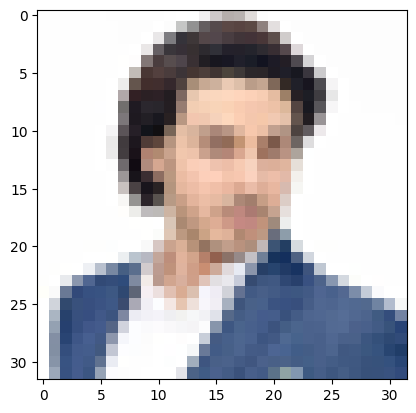

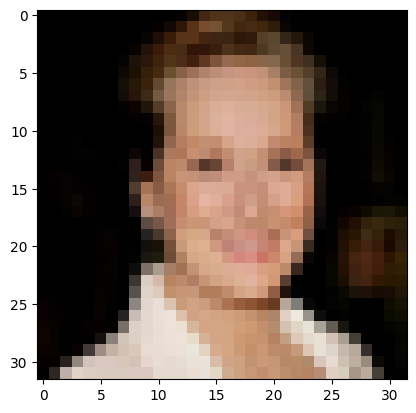

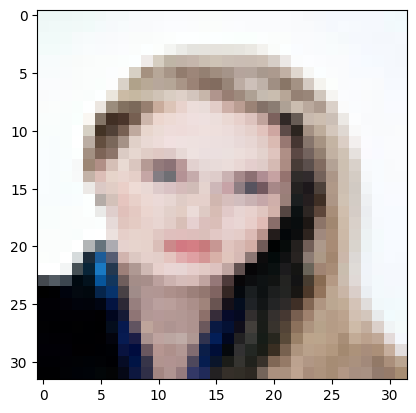

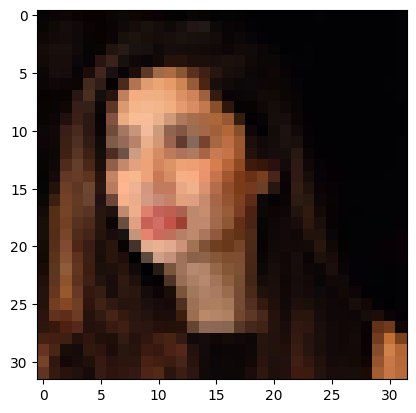

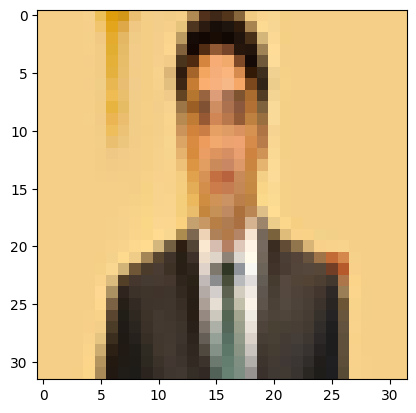


The 5 NN image is of ['meryl streep'] 


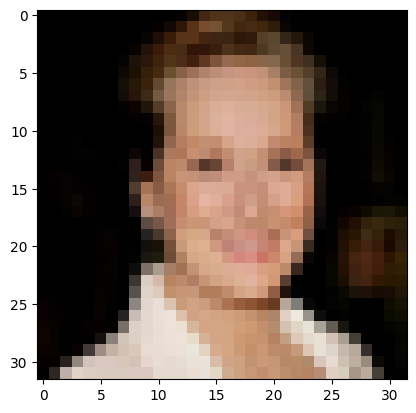

In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances


k = 5
####### Your code here #######

print(f"\nThe {k} NN images are following:")
printer = KNN_images(distances,k)

image = get_most_frequent_image(distances, k)
name = label[image[1]][0]

print(f"\nThe {k} NN image is of {name} ")
five_NN = im[:,:,:,image[1]]
plt.imshow(five_NN)
plt.show()



##############################